In [93]:
import pandas as pd
import os
import numpy as np
from config import apikey
import gmaps
import matplotlib.pyplot as plt

In [94]:
bcross_df = pd.read_csv('Border_Crossing_Entry_Data.csv')
overtime = bcross_df.drop(["Port Code","Border","Location","State"], axis=1)

In [95]:
port = 'El Paso'
measure = 'Personal Vehicles'
def cleantime(port, measure):
    wdf = overtime[overtime['Port Name'] == port]
    wdf = wdf[wdf['Measure'] == measure]
    wdf['Month'] = wdf['Date'].str.split(" ")
    wdf.loc[:, 'Day'] = wdf.Month.map(lambda x: x[0])
    del wdf['Date']
    del wdf['Month']
    return wdf
cleantime(port, measure)
elpaso = wdf
elpaso

,Port Name,Measure,Value,Day
265,El Paso,Personal Vehicles,982585,03/01/2019
1128,El Paso,Personal Vehicles,928499,02/01/2019
1625,El Paso,Personal Vehicles,1020507,01/01/2019
2505,El Paso,Personal Vehicles,969171,12/01/2018
3243,El Paso,Personal Vehicles,954517,11/01/2018
...,...,...,...,...
341764,El Paso,Personal Vehicles,1309448,05/01/1996
342017,El Paso,Personal Vehicles,1281485,04/01/1996
344122,El Paso,Personal Vehicles,1337009,03/01/1996
344688,El Paso,Personal Vehicles,1242710,02/01/1996


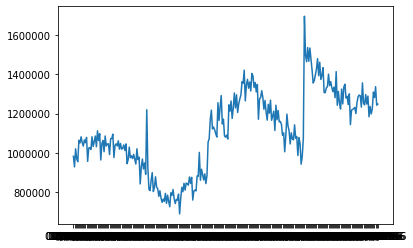

In [96]:
ElP = plt.plot(elpaso['Day'], elpaso['Value'],label="Personal Vehicles")



,Value
count,2.790000e+02
mean,1.109286e+06
std,2.000959e+05
min,6.889210e+05
25%,9.688835e+05
50%,1.090273e+06
75%,1.267630e+06
max,1.695692e+06
